# 2회차 실습 과제: 확률 기초와 확률분포

## 문제 항목

| 문제     | 주제           | 핵심 개념                            |
|----------|----------------|--------------------------------------|
| 문제 1   | 확률 기초      | 조건부 확률, 베이즈 정리, 독립/종속  |
| 문제 2   | 이산형 분포    | 이항분포, 포아송분포, PMF, CDF       |
| 문제 3   | 연속형 분포    | 지수분포, 정규분포, PDF, 확률 계산   |
| 문제 4   | Z-score와 백분위 | 표준화, 상대적 위치 비교            |

---

## 핵심 공식 정리

### 확률 법칙

| 법칙           | 공식                                                    |
|----------------|---------------------------------------------------------|
| 여사건         | $P(A^c) = 1 - P(A)$                                    |
| 덧셈 법칙      | $P(A \cup B) = P(A) + P(B) - P(A \cap B)$             |
| 곱셈 법칙      | $P(A \cap B) = P(A) \cdot P(B\|A)$                    |
| 조건부 확률    | $P(A\|B) = \frac{P(A \cap B)}{P(B)}$                  |
| 베이즈 정리    | $P(A\|B) = \frac{P(B\|A) \cdot P(A)}{P(B)}$          |
| 독립 사건      | $P(A \cap B) = P(A) \cdot P(B)$                       |

### scipy.stats 핵심 메서드

| 메서드       | 설명                          | 사용 예시                                 |
|--------------|-------------------------------|-------------------------------------------|
| `.pmf(k)`   | 확률질량함수 (이산)           | `binom.pmf(3, n=10, p=0.3)`              |
| `.pdf(x)`   | 확률밀도함수 (연속)           | `norm.pdf(170, loc=173, scale=6)`         |
| `.cdf(x)`   | 누적분포함수 P(X≤x)          | `norm.cdf(180, loc=173, scale=6)`         |
| `.sf(x)`    | 생존함수 P(X>x)              | `norm.sf(180, loc=173, scale=6)`          |
| `.ppf(q)`   | 백분위수 (CDF 역함수)        | `norm.ppf(0.9, loc=173, scale=6)`         |

---

In [1]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import platform

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("=" * 60)
print("2회차 실습 과제: 확률 기초와 확률분포")
print("=" * 60)

2회차 실습 과제: 확률 기초와 확률분포


---

## 문제 1: 확률 기초

### 시나리오: 의료 검사의 신뢰성 분석

어떤 질병 검사 키트의 성능을 분석합니다.

**주어진 정보:**
- 전체 인구 중 질병 보유율: 2% (사전 확률)
- 검사의 민감도(Sensitivity): 질병이 있는 사람이 양성 판정을 받을 확률 = 95%
- 검사의 특이도(Specificity): 질병이 없는 사람이 음성 판정을 받을 확률 = 90%

### 문제 1-1: 기본 확률 계산

**(a)** 질병이 없는 사람이 양성 판정을 받을 확률(위양성률)은?

**(b)** 임의의 한 사람이 양성 판정을 받을 전체 확률 P(양성)은?

**(c)** 양성 판정을 받은 사람이 실제로 질병이 있을 확률은?

> 이 값을 **양성예측도(PPV, Positive Predictive Value)**라고 하며, 베이즈 정리를 적용하여 구한다.

In [2]:
print("\n[문제 1-1] 의료 검사 확률 분석")
print("=" * 50)

# 주어진 정보
p_disease = 0.02          # P(질병) = 2%
p_healthy = 1 - p_disease  # P(정상) = 98%
sensitivity = 0.95         # P(양성|질병) = 95%
specificity = 0.90         # P(음성|정상) = 90%

print(f"질병 보유율: {p_disease:.1%}")
print(f"민감도 P(양성|질병): {sensitivity:.1%}")
print(f"특이도 P(음성|정상): {specificity:.1%}")

# (a): 위양성률 계산
# 특이도 = P(음성|정상) = 90%이므로
# 위양성률 = P(양성|정상) = 1 - P(음성|정상)
p_false_positive = 1 - specificity

print(f"\n(a) 위양성률 P(양성|정상): {p_false_positive:.1%}")


# (b): 전체 양성 확률 P(양성) 계산
# 전확률 공식(Law of Total Probability) 적용:
# P(양성) = P(양성|질병) × P(질병) + P(양성|정상) × P(정상)
p_positive = (sensitivity * p_disease) + (p_false_positive * p_healthy)

print(f"(b) 전체 양성 확률 P(양성): {p_positive:.4f} ({p_positive:.2%})")


# (c): 양성예측도 계산
# 베이즈 정리 적용:
# P(질병|양성) = P(양성|질병) × P(질병) / P(양성)
ppv = (sensitivity * p_disease) / p_positive

print(f"(c) 양성예측도 P(질병|양성): {ppv:.4f} ({ppv:.2%})")

print("\n" + "=" * 50)
print("해석:")
print(f"• 양성 판정을 받은 사람 중 실제 질병이 있을 확률은 약 {ppv:.1%}입니다.")
print(f"• 이는 질병 보유율({p_disease:.1%})이 낮기 때문에,")
print(f"  검사 정확도가 높아도 위양성이 많이 발생하기 때문입니다.")
print(f"• 양성 판정자 100명 중 약 {int(ppv*100)}명만 실제 질병 보유자입니다.")



[문제 1-1] 의료 검사 확률 분석
질병 보유율: 2.0%
민감도 P(양성|질병): 95.0%
특이도 P(음성|정상): 90.0%

(a) 위양성률 P(양성|정상): 10.0%
(b) 전체 양성 확률 P(양성): 0.1170 (11.70%)
(c) 양성예측도 P(질병|양성): 0.1624 (16.24%)

해석:
• 양성 판정을 받은 사람 중 실제 질병이 있을 확률은 약 16.2%입니다.
• 이는 질병 보유율(2.0%)이 낮기 때문에,
  검사 정확도가 높아도 위양성이 많이 발생하기 때문입니다.
• 양성 판정자 100명 중 약 16명만 실제 질병 보유자입니다.


### 문제 1-2: 독립 사건과 종속 사건

두 개의 주사위를 던지는 실험을 합니다.

**사건 정의:**
- 사건 A: 첫 번째 주사위가 짝수 (2, 4, 6)
- 사건 B: 두 주사위 눈의 합이 7

**(a)** P(A), P(B), P(A ∩ B)를 각각 계산하세요.

**(b)** 사건 A와 B는 독립인가요? $P(A \cap B) = P(A) \cdot P(B)$가 성립하는지 확인하세요.

**(c)** P(B|A)를 계산하고, P(B)와 비교하세요. 같다면 독립, 다르다면 종속입니다.

In [4]:
print("\n[문제 1-2] 주사위 독립/종속 분석")
print("=" * 50)

# 표본공간: 두 주사위의 모든 경우 (6 × 6 = 36가지)
total_outcomes = 36

# (a): 각 확률 계산

# 사건 A: 첫 번째 주사위가 짝수 (2, 4, 6)
# 첫 번째 주사위가 짝수인 경우: 3가지 (2, 4, 6)
# 각 경우마다 두 번째 주사위는 6가지 가능
# 따라서 3 × 6 = 18가지
outcomes_A = 18
p_A = outcomes_A / total_outcomes

# 사건 B: 두 주사위 눈의 합이 7
# (1,6), (2,5), (3,4), (4,3), (5,2), (6,1) → 6가지
outcomes_B = 6
p_B = outcomes_B / total_outcomes

# 사건 A ∩ B: 첫 번째가 짝수이면서 합이 7
# (2,5), (4,3), (6,1) → 3가지
outcomes_A_and_B = 3
p_A_and_B = outcomes_A_and_B / total_outcomes

print(f"(a) P(A) = {outcomes_A}/{total_outcomes} = {p_A:.4f} ({p_A:.1%})")
print(f" P(B) = {outcomes_B}/{total_outcomes} = {p_B:.4f} ({p_B:.4%})")
print(f" P(A ∩ B) = {outcomes_A_and_B}/{total_outcomes} = {p_A_and_B:.4f} ({p_A_and_B:.4%})")


# (b): 독립성 검정
# 독립 조건: P(A ∩ B) = P(A) × P(B)
p_A_times_B = p_A * p_B

print(f"\n(b) 독립성 검정:")
print(f" P(A) * P(B) = {p_A:.4f} * {p_B:.4f} = {p_A_times_B:.4f}")
print(f" P(A ∩ B) = {p_A_and_B:.4f}")
print(f" 차이: {abs(p_A_times_B - p_A_and_B):.6f}")

if abs(p_A_times_B - p_A_and_B) < 1e-10:
    print(f"독립 여부: 독립 (P(A ∩ B) = P(A) * P(B))")
else:
    print(f"독립 여부: 종속 (P(A ∩ B) ≠ P(A) * P(B))")


# (c): 조건부 확률 계산
# P(B|A) = P(A ∩ B) / P(A)
p_B_given_A = p_A_and_B / p_A

print(f"\n(c) 조건부 확률 분석:")
print(f" P(B|A) = P(A ∩ B) / P(A) = {p_A_and_B:.4f} / {p_A:.4f} = {p_B_given_A:.4f}")
print(f" P(B) = {p_B:.4f}")
print(f" 차이: {abs(p_B_given_A - p_B):.6f}")

if abs(p_B_given_A - p_B) < 1e-10:
    print(f" 해석: P(B|A) = P(B)이므로 독립")
else:
    print(f" 해석: P(B|A) ≠ P(B)이므로 종속")

print("\n" + "=" * 50)
print("상세 분석:")
print("\n사건 A (첫 번째 주사위가 짝수):")
print("  (2,1), (2,2), (2,3), (2,4), (2,5), (2,6)")
print("  (4,1), (4,2), (4,3), (4,4), (4,5), (4,6)")
print("  (6,1), (6,2), (6,3), (6,4), (6,5), (6,6)")
print(f"  총 {outcomes_A}가지")

print("\n사건 B (합이 7):")
print("  (1,6), (2,5), (3,4), (4,3), (5,2), (6,1)")
print(f"  총 {outcomes_B}가지")

print("\n사건 A ∩ B (첫 번째가 짝수이면서 합이 7):")
print("  (2,5), (4,3), (6,1)")
print(f"  총 {outcomes_A_and_B}가지")

print("\n결론:")
print(f" P(A ∩ B) = {p_A_and_B:.4f}")
print(f" P(A) * P(B) = {p_A_times_B:.4f}")
print(f" 두 값이 같으므로 사건 A와 B는 독립이다.")
print(f" 첫 번째 주사위가 짝수라는 정보는 합이 7일 확률에 영향을 주지 않는다.")


[문제 1-2] 주사위 독립/종속 분석
(a) P(A) = 18/36 = 0.5000 (50.0%)
 P(B) = 6/36 = 0.1667 (16.6667%)
 P(A ∩ B) = 3/36 = 0.0833 (8.3333%)

(b) 독립성 검정:
 P(A) * P(B) = 0.5000 * 0.1667 = 0.0833
 P(A ∩ B) = 0.0833
 차이: 0.000000
독립 여부: 독립 (P(A ∩ B) = P(A) * P(B))

(c) 조건부 확률 분석:
 P(B|A) = P(A ∩ B) / P(A) = 0.0833 / 0.5000 = 0.1667
 P(B) = 0.1667
 차이: 0.000000
 해석: P(B|A) = P(B)이므로 독립

상세 분석:

사건 A (첫 번째 주사위가 짝수):
  (2,1), (2,2), (2,3), (2,4), (2,5), (2,6)
  (4,1), (4,2), (4,3), (4,4), (4,5), (4,6)
  (6,1), (6,2), (6,3), (6,4), (6,5), (6,6)
  총 18가지

사건 B (합이 7):
  (1,6), (2,5), (3,4), (4,3), (5,2), (6,1)
  총 6가지

사건 A ∩ B (첫 번째가 짝수이면서 합이 7):
  (2,5), (4,3), (6,1)
  총 3가지

결론:
 P(A ∩ B) = 0.0833
 P(A) * P(B) = 0.0833
 두 값이 같으므로 사건 A와 B는 독립이다.
 첫 번째 주사위가 짝수라는 정보는 합이 7일 확률에 영향을 주지 않는다.


---

## 문제 2: 이산형 확률분포

### 시나리오 2-1: 제품 품질 검사

공장에서 생산되는 제품의 불량률은 3%입니다. 무작위로 50개 제품을 검사합니다.

**(a)** 정확히 2개가 불량일 확률

**(b)** 불량품이 3개 이하일 확률

**(c)** 불량품이 5개 이상일 확률

**(d)** 불량품 개수의 기대값과 표준편차

**(e)** 불량품 개수 분포 시각화 (PMF 막대 그래프)


[문제 2-1] 제품 품질 검사
검사 제품 수: 50개
불량률: 3.0%

(a) 정확히 2개 불량:
 P(X = 2) = 0.255518 (25.5518%)

(b) 3개 이하:
 P(X ≤ 3) = 0.937240 (93.7240%)
 = P(X=0) + P(X=1) + P(X=2) + P(X=3)
 P(X=0) = 0.218065
 P(X=1) = 0.337214
 P(X=2) = 0.255518
 P(X=3) = 0.126442

(c) 5개 이상:
 P(X ≥ 5) = 1 - P(X ≤ 4)
           = 1 - 0.983189
           = 0.016811 (1.6811%)

(d) 기대값과 표준편차:
    E[X] = n * p = 50 * 0.03 = 1.50개
    Var[X] = n * p * (1-p) = 50* 0.03* 0.97 = 1.4550
    σ = √Var[X] = 1.2062개

    해석: 평균적으로 1.5개의 불량품이 예상되며,
          표준편차는 약 1.21개입니다.


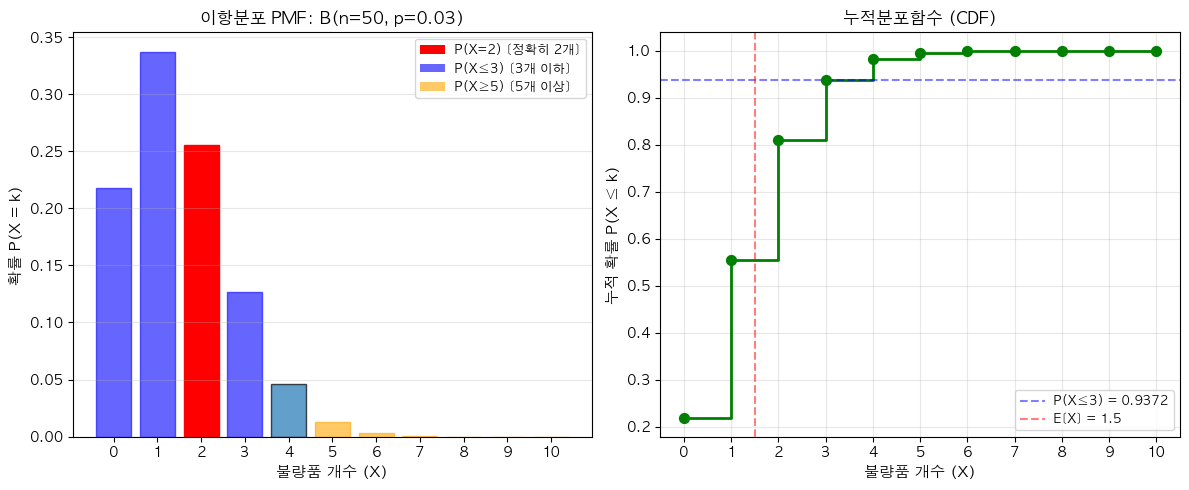


확률 요약 테이블:
--------------------------------------------------
불량품 수      확률 P(X=k)       누적 확률 P(X≤k)        
--------------------------------------------------
0          0.218065        0.218065            
1          0.337214        0.555280            
2          0.255518        0.810798             ← (a)
3          0.126442        0.937240             ← (b)
4          0.045949        0.983189             ← 기준점 (c)
5          0.013074        0.996264            
6          0.003033        0.999296            
7          0.000590        0.999886            
--------------------------------------------------

신뢰구간 (95%):
  불량품 개수가 [0, 4] 범위에 있을 확률: 95%


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

print("\n[문제 2-1] 제품 품질 검사")
print("=" * 60)

# 파라미터
n = 50      # 검사 제품 수
p = 0.03    # 불량률

print(f"검사 제품 수: {n}개")
print(f"불량률: {p:.1%}")

# 이항분포 생성: X ~ Binomial(n=50, p=0.03)
binomial_dist = stats.binom(n=n, p=p)

# (a) 정확히 2개 불량 확률
# P(X = 2)
p_exactly_2 = binomial_dist.pmf(2)

print(f"\n(a) 정확히 2개 불량:")
print(f" P(X = 2) = {p_exactly_2:.6f} ({p_exactly_2:.4%})")


# (b) 3개 이하 확률
# P(X ≤ 3) = P(X = 0) + P(X = 1) + P(X = 2) + P(X = 3)
p_at_most_3 = binomial_dist.cdf(3)

print(f"\n(b) 3개 이하:")
print(f" P(X ≤ 3) = {p_at_most_3:.6f} ({p_at_most_3:.4%})")

# 상세 계산
print(f" = P(X=0) + P(X=1) + P(X=2) + P(X=3)")
for k in range(4):
    print(f" P(X={k}) = {binomial_dist.pmf(k):.6f}")


# (c) 5개 이상 확률
# P(X ≥ 5) = 1 - P(X ≤ 4)
p_at_least_5 = 1 - binomial_dist.cdf(4)

print(f"\n(c) 5개 이상:")
print(f" P(X ≥ 5) = 1 - P(X ≤ 4)")
print(f"           = 1 - {binomial_dist.cdf(4):.6f}")
print(f"           = {p_at_least_5:.6f} ({p_at_least_5:.4%})")


# (d) 기대값과 표준편차
# 이항분포: E[X] = n*p, Var[X] = n*p*(1-p), σ = sqrt(n*p*(1-p))
expected_value = n * p
variance = n * p * (1 - p)
std_dev = np.sqrt(variance)

print(f"\n(d) 기대값과 표준편차:")
print(f"    E[X] = n * p = {n} * {p} = {expected_value:.2f}개")
print(f"    Var[X] = n * p * (1-p) = {n}* {p}* {1-p} = {variance:.4f}")
print(f"    σ = √Var[X] = {std_dev:.4f}개")
print(f"\n    해석: 평균적으로 {expected_value:.1f}개의 불량품이 예상되며,")
print(f"          표준편차는 약 {std_dev:.2f}개입니다.")


# x축: 0부터 10개까지 (대부분의 확률 질량이 이 범위에 있음)
x_values = np.arange(0, 11)
pmf_values = binomial_dist.pmf(x_values)

# 그래프 생성
plt.figure(figsize=(12, 5))

# 서브플롯 1: PMF (전체 범위)
plt.subplot(1, 2, 1)
x_full = np.arange(0, 11)
pmf_full = binomial_dist.pmf(x_full)

bars = plt.bar(x_full, pmf_full, alpha=0.7, edgecolor='black')

# 특정 값 강조
bars[2].set_color('red')      # 정확히 2개
bars[2].set_alpha(1.0)

for i in range(4):              # 3개 이하
    if i != 2:
        bars[i].set_color('blue')
        bars[i].set_alpha(0.6)

for i in range(5, len(bars)):   # 5개 이상
    bars[i].set_color('orange')
    bars[i].set_alpha(0.6)

plt.xlabel('불량품 개수 (X)', fontsize=11)
plt.ylabel('확률 P(X = k)', fontsize=11)
plt.title('이항분포 PMF: B(n=50, p=0.03)', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.xticks(x_full)

# 범례
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', alpha=1.0, label='P(X=2) [정확히 2개]'),
    Patch(facecolor='blue', alpha=0.6, label='P(X≤3) [3개 이하]'),
    Patch(facecolor='orange', alpha=0.6, label='P(X≥5) [5개 이상]')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=9)


# 서브플롯 2: CDF (누적분포함수)
plt.subplot(1, 2, 2)
x_cdf = np.arange(0, 11)
cdf_values = binomial_dist.cdf(x_cdf)

plt.step(x_cdf, cdf_values, where='post', linewidth=2, color='green')
plt.scatter(x_cdf, cdf_values, color='green', s=50, zorder=3)

# 주요 지점 표시
plt.axhline(y=p_at_most_3, color='blue', linestyle='--', alpha=0.5, 
            label=f'P(X≤3) = {p_at_most_3:.4f}')
plt.axvline(x=expected_value, color='red', linestyle='--', alpha=0.5,
            label=f'E[X] = {expected_value:.1f}')

plt.xlabel('불량품 개수 (X)', fontsize=11)
plt.ylabel('누적 확률 P(X ≤ k)', fontsize=11)
plt.title('누적분포함수 (CDF)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(x_cdf)
plt.legend(fontsize=9)

plt.tight_layout()
plt.show()


#확률 요약 테이블
print("\n" + "=" * 50)
print("확률 요약 테이블:")
print("-" * 50)
print(f"{'불량품 수':<10} {'확률 P(X=k)':<15} {'누적 확률 P(X≤k)':<20}")
print("-" * 50)
for k in range(8):
    pmf_k = binomial_dist.pmf(k)
    cdf_k = binomial_dist.cdf(k)
    marker = ""
    if k == 2:
        marker = " ← (a)"
    elif k == 3:
        marker = " ← (b)"
    elif k == 4:
        marker = " ← 기준점 (c)"
    print(f"{k:<10} {pmf_k:<15.6f} {cdf_k:<20.6f}{marker}")

print("-" * 50)
print(f"\n신뢰구간 (95%):")
# 95% 신뢰구간
lower = binomial_dist.ppf(0.025)
upper = binomial_dist.ppf(0.975)
print(f"  불량품 개수가 [{lower:.0f}, {upper:.0f}] 범위에 있을 확률: 95%")


In [ ]:
# (e) PMF 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# TODO: 시각화 코드 작성

ax.set_xlabel('불량품 개수')
ax.set_ylabel('확률 P(X=k)')
ax.set_title('제품 품질 검사: 불량품 개수 분포', fontweight='bold')

plt.tight_layout()
plt.show()

### 시나리오 2-2: 고객 서비스 센터

고객 서비스 센터에 시간당 평균 8건의 문의가 들어옵니다.

**(a)** 정확히 10건의 문의가 올 확률

**(b)** 5건 이하의 문의가 올 확률

**(c)** 12건 이상의 문의가 올 확률 — "바쁜 시간"의 기준

**(d)** 상담원 1명이 시간당 최대 10건을 처리할 수 있다면, 1명으로 충분할 확률은?

**(e)** 95% 확률로 처리 가능하려면 시간당 최대 몇 건까지 대비해야 할까? (ppf 사용)

In [7]:
from scipy import stats

print("\n[문제 2-2] 고객 서비스 센터")
print("=" * 50)

lam = 8
rv = stats.poisson(mu=lam)

print(f"시간당 평균 문의 건수: {lam}건")

# (a) 정확히 10건 확률
p_exactly_10 = rv.pmf(10)
print(f"\n(a) P(X = 10) = {p_exactly_10:.4f}")

# (b) 5건 이하 확률
p_at_most_5 = rv.cdf(5)
print(f"(b) P(X ≤ 5) = {p_at_most_5:.4f}")

# (c) 12건 이상 확률
p_at_least_12 = 1 - rv.cdf(11)  # = 1 - P(X ≤ 11)
print(f"(c) P(X ≥ 12) = {p_at_least_12:.4f}")

# (d) 1명으로 충분할 확률 (10건 이하)
p_manageable = rv.cdf(10)
print(f"\n(d) 상담원 1명으로 처리 가능 확률 = {p_manageable:.4f}")

# (e) 95% 커버리지를 위한 용량
capacity_95 = int(rv.ppf(0.95))
print(f"(e) 95% 대비 용량: {capacity_95}건")




[문제 2-2] 고객 서비스 센터
시간당 평균 문의 건수: 8건

(a) P(X = 10) = 0.0993
(b) P(X ≤ 5) = 0.1912
(c) P(X ≥ 12) = 0.1119

(d) 상담원 1명으로 처리 가능 확률 = 0.8159
(e) 95% 대비 용량: 13건


---

## 문제 3: 연속형 확률분포

### 시나리오 3-1: 전자제품 수명 분석

어떤 전자제품의 평균 수명은 500시간입니다. 제품 수명은 무기억성을 가지는 분포를 따릅니다.

**(a)** 300시간 이내에 고장날 확률

**(b)** 700시간 이상 작동할 확률

**(c)** 이미 400시간 작동한 제품이 추가로 200시간 더 작동할 확률 (무기억성을 활용하여 검증)

**(d)** 하위 10%가 고장나는 시점 (보증 기간 설정용 — ppf 사용)

In [8]:
from scipy import stats

print("\n[문제 3-1] 전자제품 수명 분석")
print("=" * 50)

mean_life = 500
lam = 1 / mean_life  # rate parameter
rv = stats.expon(scale=mean_life)  # scale = 1/λ = mean

print(f"평균 수명: {mean_life}시간")
print(f"λ (고장률): {lam}")

# (a) 300시간 이내 고장 확률
p_fail_300 = rv.cdf(300)
print(f"\n(a) P(X ≤ 300) = {p_fail_300:.4f}")

# (b) 700시간 이상 작동 확률
p_survive_700 = 1 - rv.cdf(700)  # = rv.sf(700)
print(f"(b) P(X ≥ 700) = {p_survive_700:.4f}")

# (c) 무기억성 검증: P(X > 600 | X > 400) = P(X > 200)
p_additional_200 = 1 - rv.cdf(200) 
# 검증: 조건부 확률 직접 계산
p_conditional = (1 - rv.cdf(600)) / (1 - rv.cdf(400))
print(f"\n(c) 무기억성 활용: P(X > 200) = {p_additional_200:.4f}")
print(f" 검증: P(X > 600 | X > 400) = {p_conditional:.4f}")
print(f" 두 값 일치: {abs(p_additional_200 - p_conditional) < 1e-10}")

# (d) 하위 10% 고장 시점 (보증 기간)
warranty_time = rv.ppf(0.10)
print(f"\n(d) 하위 10% 고장 시점 (보증 기간): {warranty_time:.1f}시간")


[문제 3-1] 전자제품 수명 분석
평균 수명: 500시간
λ (고장률): 0.002

(a) P(X ≤ 300) = 0.4512
(b) P(X ≥ 700) = 0.2466

(c) 무기억성 활용: P(X > 200) = 0.6703
 검증: P(X > 600 | X > 400) = 0.6703
 두 값 일치: True

(d) 하위 10% 고장 시점 (보증 기간): 52.7시간


### 시나리오 3-2: 시험 점수 분석

어떤 시험의 점수는 평균 72점, 표준편차 12점인 정규분포를 따릅니다.

**(a)** 60점 이상 84점 이하를 받을 확률 (구간 확률: `cdf(84) - cdf(60)`)

**(b)** 상위 15%에 들려면 최소 몇 점이 필요한가? (`ppf(1 - 0.15)` 사용)

**(c)** 하위 5%는 F 학점이라면, F 학점 기준 점수는? (`ppf(0.05)` 사용)

**(d)** 90점을 받은 학생은 상위 몇 %인가? (`sf(90)` 사용)

In [9]:
from scipy import stats

print("\n[문제 3-2] 시험 점수 분석")
print("=" * 50)

mu = 72
sigma = 12
rv = stats.norm(loc=mu, scale=sigma)

print(f"평균: {mu}점")
print(f"표준편차: {sigma}점")

# (a) 60점 이상 84점 이하 확률
p_between = rv.cdf(84) - rv.cdf(60)
print(f"\n(a) P(60 ≤ X ≤ 84) = {p_between:.4f}")

# (b) 상위 15% 커트라인
top_15_cutoff = rv.ppf(1 - 0.15)
print(f"(b) 상위 15% 커트라인: {top_15_cutoff:.2f}점")

# (c) 하위 5% (F 학점) 기준
f_grade_cutoff = rv.ppf(0.05)
print(f"(c) F 학점 기준 (하위 5%): {f_grade_cutoff:.2f}점")

# (d) 90점의 백분위
top_percentile_90 = rv.sf(90) * 100
print(f"(d) 90점 학생의 위치: 상위 {top_percentile_90:.2f}%")



[문제 3-2] 시험 점수 분석
평균: 72점
표준편차: 12점

(a) P(60 ≤ X ≤ 84) = 0.6827
(b) 상위 15% 커트라인: 84.44점
(c) F 학점 기준 (하위 5%): 52.26점
(d) 90점 학생의 위치: 상위 6.68%


---

## 문제 4: Z-score와 상대적 위치 비교

### 시나리오: 다른 과목 성적 비교

영희의 두 과목 성적을 비교합니다.

| 과목 | 영희 점수 | 반 평균 | 표준편차 |
|------|-----------|---------|----------|
| 수학 | 78점      | 65점    | 10점     |
| 영어 | 85점      | 75점    | 15점     |

**절대 점수는 영어가 높지만, 상대적으로 어느 과목을 더 잘 본 걸까?**

**(a)** 각 과목의 Z-score를 계산하세요.

**(b)** 각 과목에서 영희가 상위 몇 %인지 계산하세요.

**(c)** 결론: Z-score와 상위 %를 비교하여 상대적으로 어느 과목을 더 잘 봤는지 판단하세요.

In [ ]:
print("\n[문제 4] Z-score와 상대적 위치 비교")
print("=" * 50)

# 주어진 정보
math_score, math_mean, math_std = 78, 65, 10
eng_score, eng_mean, eng_std = 85, 75, 15

print("영희의 성적:")
print(f"  수학: {math_score}점 (반 평균 {math_mean}, 표준편차 {math_std})")
print(f"  영어: {eng_score}점 (반 평균 {eng_mean}, 표준편차 {eng_std})")

# TODO (a): Z-score 계산
z_math = None
z_eng = None

print(f"\n(a) Z-score 계산")
print(f"    수학: Z = {z_math}")
print(f"    영어: Z = {z_eng}")


# TODO (b): 상위 % 계산
top_pct_math = None
top_pct_eng = None

print(f"\n(b) 상위 % 계산")
print(f"    수학: 상위 {top_pct_math}%")
print(f"    영어: 상위 {top_pct_eng}%")


# TODO (c): 결론 작성
print("\n(c) 결론:")
# print("    ...")



In [ ]:
# 시각화: 두 과목 비교
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 왼쪽: 수학 분포
x_math = np.linspace(math_mean - 4*math_std, math_mean + 4*math_std, 1000)
y_math = stats.norm.pdf(x_math, math_mean, math_std)
axes[0].plot(x_math, y_math, 'b-', linewidth=2)
axes[0].fill_between(x_math, y_math, alpha=0.2)
axes[0].axvline(math_score, color='red', linestyle='--', linewidth=2, label=f'영희 점수: {math_score}점')
axes[0].axvline(math_mean, color='green', linestyle=':', linewidth=2, label=f'평균: {math_mean}점')
axes[0].set_xlabel('점수')
axes[0].set_ylabel('확률 밀도')
axes[0].set_title(f'수학: Z = {z_math if z_math else "?"} (상위 {top_pct_math if top_pct_math else "?"}%)', fontweight='bold')
axes[0].legend()

# 오른쪽: 영어 분포
x_eng = np.linspace(eng_mean - 4*eng_std, eng_mean + 4*eng_std, 1000)
y_eng = stats.norm.pdf(x_eng, eng_mean, eng_std)
axes[1].plot(x_eng, y_eng, 'b-', linewidth=2)
axes[1].fill_between(x_eng, y_eng, alpha=0.2)
axes[1].axvline(eng_score, color='red', linestyle='--', linewidth=2, label=f'영희 점수: {eng_score}점')
axes[1].axvline(eng_mean, color='green', linestyle=':', linewidth=2, label=f'평균: {eng_mean}점')
axes[1].set_xlabel('점수')
axes[1].set_ylabel('확률 밀도')
axes[1].set_title(f'영어: Z = {z_eng if z_eng else "?"} (상위 {top_pct_eng if top_pct_eng else "?"}%)', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()